## Biblioteca e import dos dados

In [1]:
import pandas as pd
import numpy as np
from prophet.plot import plot_cross_validation_metric

In [2]:
df1 =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bootcamp2/datalake/silver/kaggle_covid_filtro_paises/full_grouped_filtro_começo_do_covid.csv')#estou usando um df que foi retirado os dias que antes da primeira contaminação de cada pais

In [3]:
#df1 = df1.replace("Argentina", "1")
#df1 = df1.replace("Chile", "2")
#df1 = df1.replace("Ecuador", "3")
#df1 = df1.replace("Mexico", "4")
#df1 = df1.replace("Spain", "5")
#df1 = df1.replace("Americas", "1")
#df1 = df1.replace("Europe", "2")
df1 = df1.rename({'Date': 'ds'}, axis = 1)
df1 = df1.rename({'New cases': 'y'}, axis = 1)
df1.head(30)

,Unnamed: 0,ds,Country/Region,Confirmed,Deaths,Recovered,Active,y,New deaths,New recovered,WHO Region
0,2027,2020-02-01,Spain,1,0,0,1,1,0,0,Europe
1,2214,2020-02-02,Spain,1,0,0,1,0,0,0,Europe
2,2401,2020-02-03,Spain,1,0,0,1,0,0,0,Europe
3,2588,2020-02-04,Spain,1,0,0,1,0,0,0,Europe
4,2775,2020-02-05,Spain,1,0,0,1,0,0,0,Europe
5,2962,2020-02-06,Spain,1,0,0,1,0,0,0,Europe
6,3149,2020-02-07,Spain,1,0,0,1,0,0,0,Europe
7,3336,2020-02-08,Spain,1,0,0,1,0,0,0,Europe
8,3523,2020-02-09,Spain,2,0,0,2,1,0,0,Europe
9,3710,2020-02-10,Spain,2,0,0,2,0,0,0,Europe


## Previsão da Argentina

###Teste com Prophet limpo

In [4]:
pais=['Argentina']
df_ag = df1[df1['Country/Region'].isin(pais)]
df_ag= df_ag[['ds','y']]


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbfq58ezd/_e1epvtw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbfq58ezd/ewvjcu8p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21493', 'data', 'file=/tmp/tmpbfq58ezd/_e1epvtw.json', 'init=/tmp/tmpbfq58ezd/ewvjcu8p.json', 'output', 'file=/tmp/tmpbfq58ezd/prophet_modeldsct6m61/prophet_model-20221209024004.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:40:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:40:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality

<bound method Figure.show of <Figure size 648x432 with 2 Axes>>

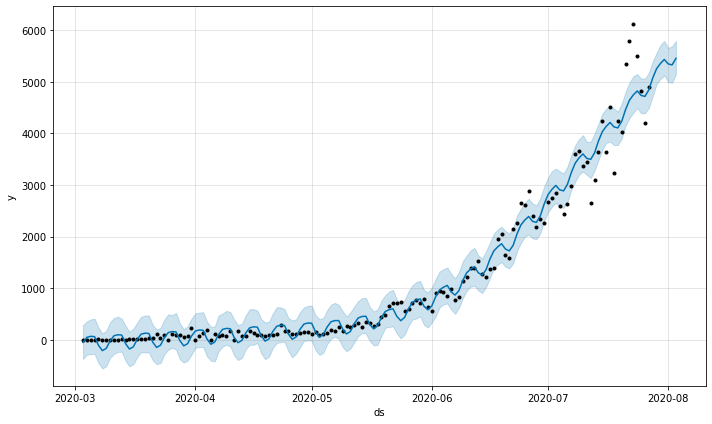

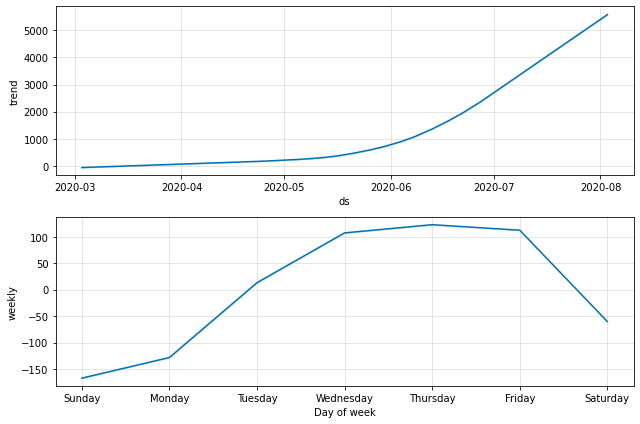

In [5]:
from prophet import Prophet

m = Prophet()
m.fit(df_ag)
m = Prophet()
m.fit(df_ag)

future = m.make_future_dataframe(periods=7)
forecast = m.predict(future)


fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)
fig1.show
fig2.show

### Busca dos melhores parametros a ser usado no Prophet

In [6]:
import itertools
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(df_ag)  # Fit model with given params
    df_cv = cross_validation(m, horizon='30 days', parallel="processes") # retirado cutoffs=cutoffs
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)
best_params = all_params[np.argmin(rmses)]
print(best_params)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbfq58ezd/fyr5cey9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbfq58ezd/uj1rpncz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5934', 'data', 'file=/tmp/tmpbfq58ezd/fyr5cey9.json', 'init=/tmp/tmpbfq58ezd/uj1rpncz.json', 'output', 'file=/tmp/tmpbfq58ezd/prophet_model729xncfn/prophet_model-20221209024007.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:40:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:40:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
02:40:07 - cmdstanpy - ERROR - Chain [1] e

    changepoint_prior_scale  seasonality_prior_scale         rmse
0                     0.001                     0.01  1924.327156
1                     0.001                     0.10  1916.457330
2                     0.001                     1.00  1919.043388
3                     0.001                    10.00  1919.026058
4                     0.010                     0.01  1920.152752
5                     0.010                     0.10  1917.240413
6                     0.010                     1.00  1917.875599
7                     0.010                    10.00  1917.473484
8                     0.100                     0.01   792.041739
9                     0.100                     0.10   797.307634
10                    0.100                     1.00   796.331746
11                    0.100                    10.00   793.598394
12                    0.500                     0.01   747.359574
13                    0.500                     0.10   747.829185
14        

###Utilização dos parametros obtidos

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbfq58ezd/gucbij80.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbfq58ezd/p2x6s2o3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47190', 'data', 'file=/tmp/tmpbfq58ezd/gucbij80.json', 'init=/tmp/tmpbfq58ezd/p2x6s2o3.json', 'output', 'file=/tmp/tmpbfq58ezd/prophet_model5nif509y/prophet_model-20221209024039.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:40:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:40:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<bound method Figure.show of <Figure size 648x432 with 2 Axes>>

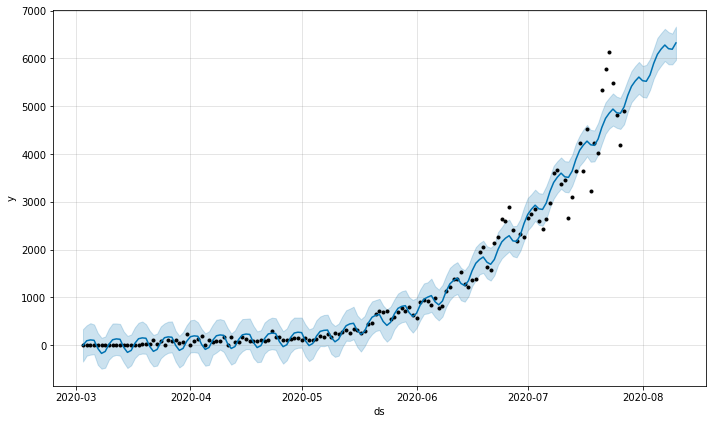

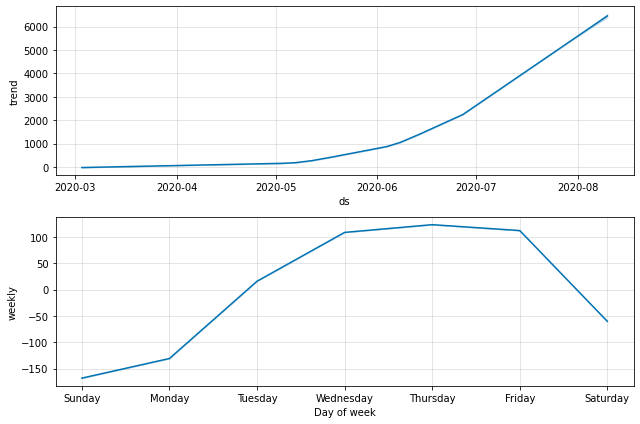

In [7]:
m = Prophet(seasonality_prior_scale=10.0, changepoint_prior_scale = 0.5).fit(df_ag)
future = m.make_future_dataframe(periods=14)

forecast = m.predict(future)
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)
fig1.show
fig2.show

### Acrescimo do lockdow do pais

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbfq58ezd/z_u7asxt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbfq58ezd/lxpmde45.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83909', 'data', 'file=/tmp/tmpbfq58ezd/z_u7asxt.json', 'init=/tmp/tmpbfq58ezd/lxpmde45.json', 'output', 'file=/tmp/tmpbfq58ezd/prophet_modelv4vwi9hl/prophet_model-20221209024040.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:40:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:40:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


      holiday         ds  lower_window   ds_upper  upper_window
0  lockdown_1 2020-03-19             0 2020-05-10            52






<bound method Figure.show of <Figure size 648x432 with 2 Axes>>

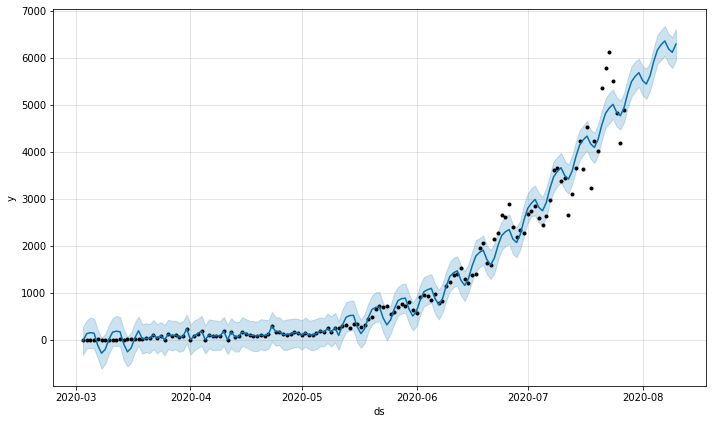

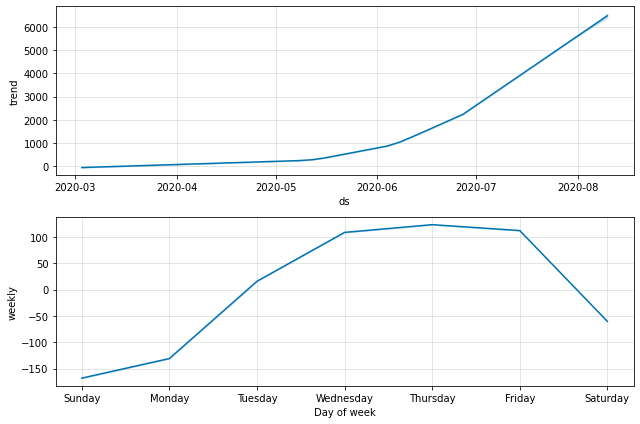

In [8]:
lockdowns = pd.DataFrame([
    {'holiday': 'lockdown_1', 'ds': '2020-03-19', 'lower_window': 0, 'ds_upper': '2020-05-10'}])
for t_col in ['ds', 'ds_upper']:
    lockdowns[t_col] = pd.to_datetime(lockdowns[t_col])
lockdowns['upper_window'] = (lockdowns['ds_upper'] - lockdowns['ds']).dt.days
print(lockdowns)

print("\n")

m2 = Prophet(holidays=lockdowns,seasonality_prior_scale=10.0, changepoint_prior_scale = 0.5)
m2 = m2.fit(df_ag)
future2 = m2.make_future_dataframe(periods=14)
forecast2 = m2.predict(future2)

print("\n")

fig1 = m.plot(forecast2)
fig2 = m.plot_components(forecast2)
fig1.show
fig2.show


###criação do csv

In [9]:
#criação do csv
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()
forecast.to_csv("prev_agentina.csv")

## Previsão da Spain


###Prophet limpo

In [10]:
pais=['Spain']
df_sp = df1[df1['Country/Region'].isin(pais)]
df_sp= df_sp[['ds','y']]

m = Prophet()
m.fit(df_sp)

future = m.make_future_dataframe(periods=14)

forecast = m.predict(future)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbfq58ezd/165y3ih2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbfq58ezd/35rolgcb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61852', 'data', 'file=/tmp/tmpbfq58ezd/165y3ih2.json', 'init=/tmp/tmpbfq58ezd/35rolgcb.json', 'output', 'file=/tmp/tmpbfq58ezd/prophet_modelcvtxfuka/prophet_model-20221209024042.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:40:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:40:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<bound method Figure.show of <Figure size 648x432 with 2 Axes>>

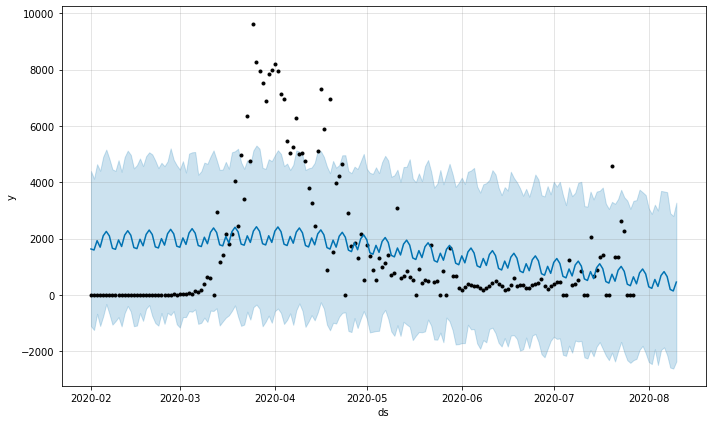

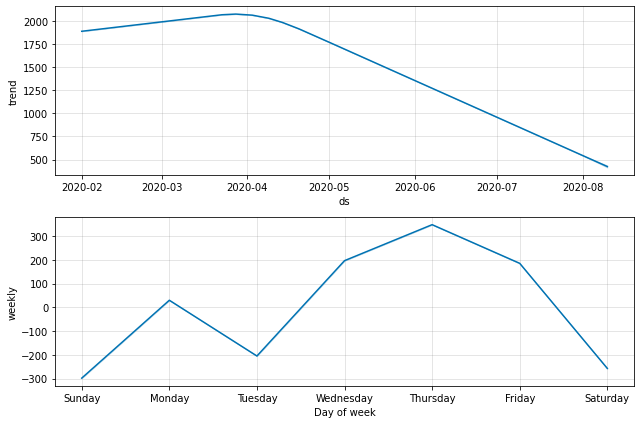

In [11]:
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)
fig1.show
fig2.show

###Busca dos melhores parametros a ser usado no Prophet

In [12]:
import itertools
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(df_sp)  # Fit model with given params
    df_cv = cross_validation(m, horizon='30 days', parallel="processes") # retirado cutoffs=cutoffs
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)
best_params = all_params[np.argmin(rmses)]
print(best_params)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbfq58ezd/niledwnq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbfq58ezd/jz61nlaj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80589', 'data', 'file=/tmp/tmpbfq58ezd/niledwnq.json', 'init=/tmp/tmpbfq58ezd/jz61nlaj.json', 'output', 'file=/tmp/tmpbfq58ezd/prophet_modelxfu65qlm/prophet_model-20221209024043.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:40:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:40:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
02:40:43 - cmdstanpy - ERROR - Chain [1] 

    changepoint_prior_scale  seasonality_prior_scale         rmse
0                     0.001                     0.01  3027.894993
1                     0.001                     0.10  2840.835261
2                     0.001                     1.00  2888.548249
3                     0.001                    10.00  2876.336229
4                     0.010                     0.01  3127.264849
5                     0.010                     0.10  3103.876495
6                     0.010                     1.00  3086.735911
7                     0.010                    10.00  3110.582314
8                     0.100                     0.01  2185.870434
9                     0.100                     0.10  2260.954190
10                    0.100                     1.00  2266.359869
11                    0.100                    10.00  2283.224827
12                    0.500                     0.01  1524.178571
13                    0.500                     0.10  1599.918513
14        

###Utilização dos parametros obtidos

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbfq58ezd/ynb9j8xj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbfq58ezd/ewcmlyd7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68185', 'data', 'file=/tmp/tmpbfq58ezd/ynb9j8xj.json', 'init=/tmp/tmpbfq58ezd/ewcmlyd7.json', 'output', 'file=/tmp/tmpbfq58ezd/prophet_modelrhgr1o5s/prophet_model-20221209024129.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:41:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:41:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<bound method Figure.show of <Figure size 648x432 with 2 Axes>>

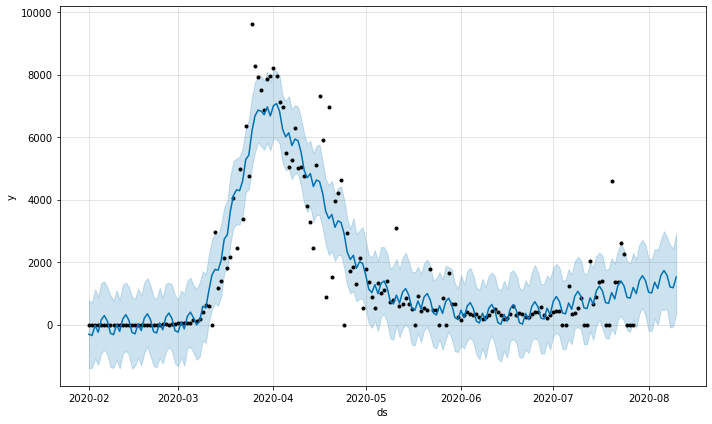

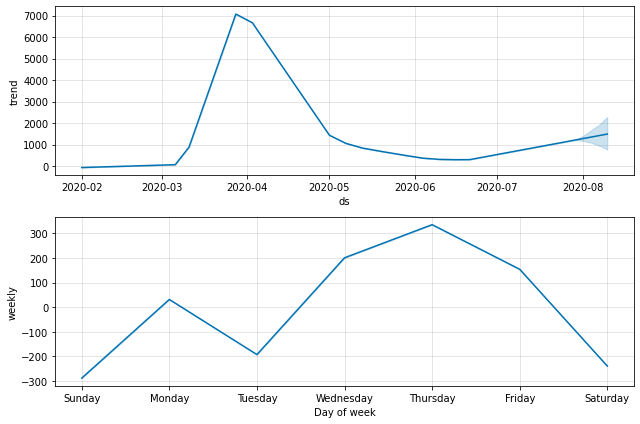

In [13]:
m = Prophet(seasonality_prior_scale=1.0, changepoint_prior_scale = 0.5).fit(df_sp)
future = m.make_future_dataframe(periods=14)

forecast = m.predict(future)
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)
fig1.show
fig2.show

### Acrescimo do lockdow do pais

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


      holiday         ds  lower_window   ds_upper  upper_window
0  lockdown_1 2020-03-14             0 2020-05-09            56




DEBUG:cmdstanpy:input tempfile: /tmp/tmpbfq58ezd/b5nfydk5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbfq58ezd/o96lug9c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78287', 'data', 'file=/tmp/tmpbfq58ezd/b5nfydk5.json', 'init=/tmp/tmpbfq58ezd/o96lug9c.json', 'output', 'file=/tmp/tmpbfq58ezd/prophet_modelndg13r2v/prophet_model-20221209024130.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:41:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:41:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<bound method Figure.show of <Figure size 648x432 with 2 Axes>>

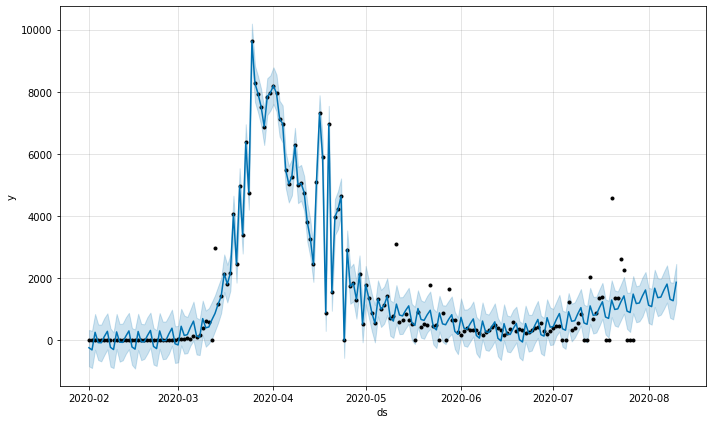

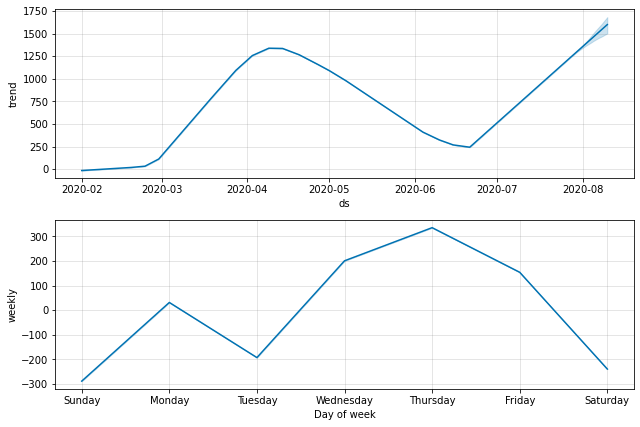

In [14]:
lockdowns = pd.DataFrame([
    {'holiday': 'lockdown_1', 'ds': '2020-03-14', 'lower_window': 0, 'ds_upper': '2020-05-09'}])
for t_col in ['ds', 'ds_upper']:
    lockdowns[t_col] = pd.to_datetime(lockdowns[t_col])
lockdowns['upper_window'] = (lockdowns['ds_upper'] - lockdowns['ds']).dt.days
print(lockdowns)

print("\n")

m2 = Prophet(holidays=lockdowns,seasonality_prior_scale=1.0, changepoint_prior_scale = 0.5)
m2 = m2.fit(df_sp)
future2 = m2.make_future_dataframe(periods=14)
forecast2 = m2.predict(future2)

print("\n")

fig1 = m.plot(forecast2)
fig2 = m.plot_components(forecast2)
fig1.show
fig2.show


###Criação do CSV

In [15]:
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()
forecast2.to_csv("prev_span.csv")

## Previsão da Chile

###Prophet Limpo

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbfq58ezd/26ew3198.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbfq58ezd/nxric213.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91743', 'data', 'file=/tmp/tmpbfq58ezd/26ew3198.json', 'init=/tmp/tmpbfq58ezd/nxric213.json', 'output', 'file=/tmp/tmpbfq58ezd/prophet_model04m898jl/prophet_model-20221209024132.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:41:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:41:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<bound method Figure.show of <Figure size 648x432 with 2 Axes>>

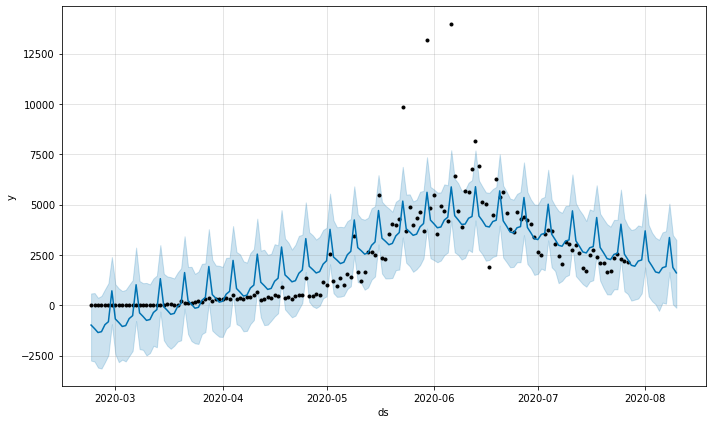

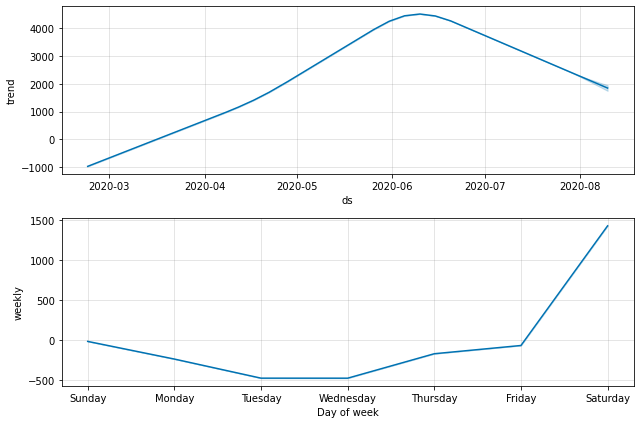

In [16]:
pais=['Chile']
df_ch = df1[df1['Country/Region'].isin(pais)]
df_ch= df_ch[['ds','y']]

m = Prophet()
m.fit(df_ch)

future = m.make_future_dataframe(periods=14)

forecast = m.predict(future)
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()
forecast.to_csv("prev_chile.csv")

fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)
fig1.show
fig2.show


###Busca dos melhores parametros


In [17]:
import itertools
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(df_ch)  # Fit model with given params
    df_cv = cross_validation(m, horizon='30 days', parallel="processes") # retirado cutoffs=cutoffs
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)
best_params = all_params[np.argmin(rmses)]
print(best_params)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbfq58ezd/00d2dlql.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbfq58ezd/sd_70fvq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80819', 'data', 'file=/tmp/tmpbfq58ezd/00d2dlql.json', 'init=/tmp/tmpbfq58ezd/sd_70fvq.json', 'output', 'file=/tmp/tmpbfq58ezd/prophet_modelwtw6kpk1/prophet_model-20221209024133.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:41:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:41:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
02:41:33 - cmdstanpy - ERROR - Chain [1] 

    changepoint_prior_scale  seasonality_prior_scale         rmse
0                     0.001                     0.01  3294.876665
1                     0.001                     0.10  3281.476475
2                     0.001                     1.00  3285.199919
3                     0.001                    10.00  3291.757212
4                     0.010                     0.01  3226.695918
5                     0.010                     0.10  3241.752806
6                     0.010                     1.00  3235.515412
7                     0.010                    10.00  3136.970902
8                     0.100                     0.01  4458.305845
9                     0.100                     0.10  4396.426915
10                    0.100                     1.00  4386.431705
11                    0.100                    10.00  4337.327678
12                    0.500                     0.01  4114.812886
13                    0.500                     0.10  4128.791065
14        

###Utilização dos parametros obtidos 


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbfq58ezd/iu0w3rlh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbfq58ezd/f2vepxe5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33517', 'data', 'file=/tmp/tmpbfq58ezd/iu0w3rlh.json', 'init=/tmp/tmpbfq58ezd/f2vepxe5.json', 'output', 'file=/tmp/tmpbfq58ezd/prophet_model_8oeon22/prophet_model-20221209024224.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:42:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:42:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<bound method Figure.show of <Figure size 648x432 with 2 Axes>>

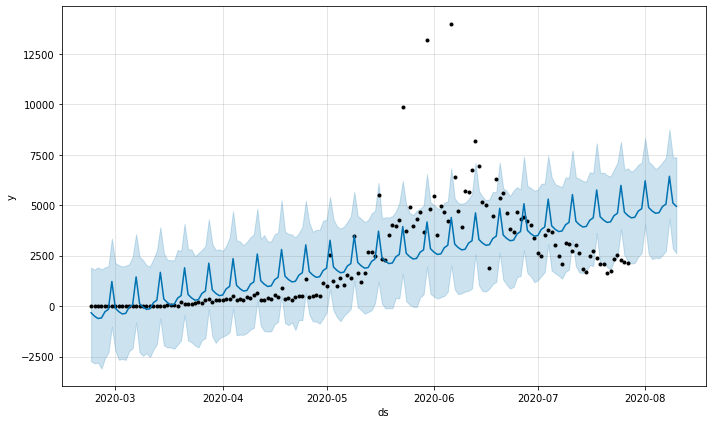

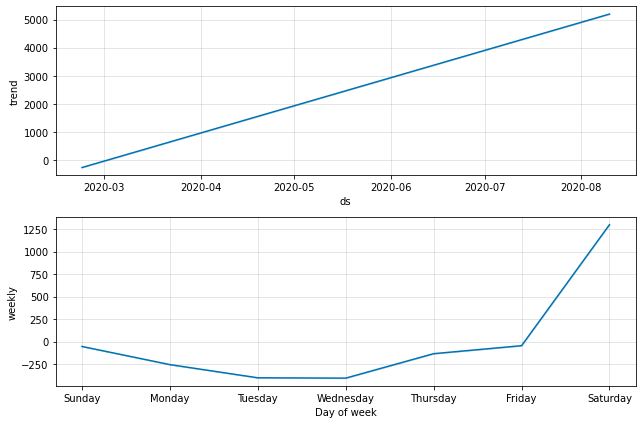

In [18]:
m = Prophet(seasonality_prior_scale=10.0, changepoint_prior_scale = 0.01).fit(df_ch)
future = m.make_future_dataframe(periods=14)

forecast = m.predict(future)
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)
fig1.show
fig2.show

###criação do csv


In [19]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()
forecast.to_csv("prev_chile.csv")

## Previsão do Ecuador

###Prophet limpo

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbfq58ezd/21i6sbae.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbfq58ezd/323i16w0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86393', 'data', 'file=/tmp/tmpbfq58ezd/21i6sbae.json', 'init=/tmp/tmpbfq58ezd/323i16w0.json', 'output', 'file=/tmp/tmpbfq58ezd/prophet_modelfy484xgq/prophet_model-20221209024226.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:42:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:42:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<bound method Figure.show of <Figure size 648x432 with 2 Axes>>

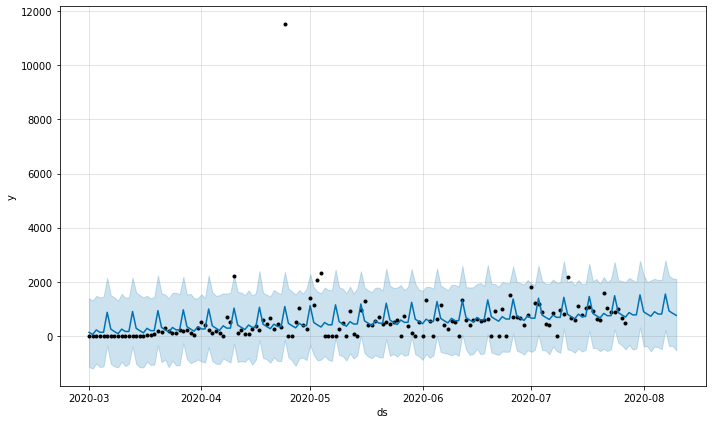

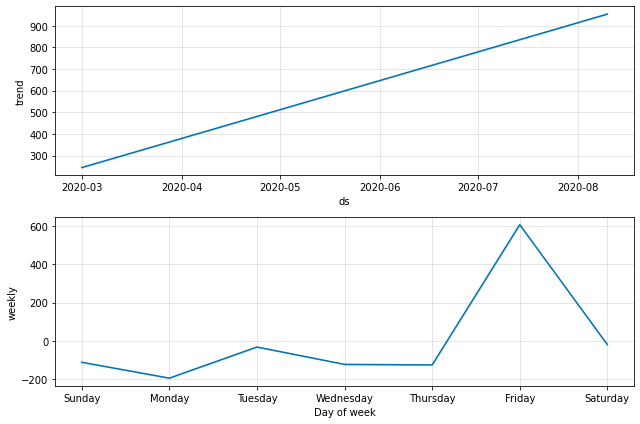

In [20]:
pais=['Ecuador']
df_ec = df1[df1['Country/Region'].isin(pais)]
df_ec= df_ec[['ds','y']]

m = Prophet()
m.fit(df_ec)

future = m.make_future_dataframe(periods=14)

forecast = m.predict(future)


fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)
fig1.show
fig2.show

###Busca dos melhores parametros a ser usado no Prophet

In [21]:
param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(df_ec)  # Fit model with given params
    df_cv = cross_validation(m, horizon='30 days', parallel="processes") # retirado cutoffs=cutoffs
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)
best_params = all_params[np.argmin(rmses)]
print(best_params)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbfq58ezd/6jqc1tqm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbfq58ezd/udh7et5e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35207', 'data', 'file=/tmp/tmpbfq58ezd/6jqc1tqm.json', 'init=/tmp/tmpbfq58ezd/udh7et5e.json', 'output', 'file=/tmp/tmpbfq58ezd/prophet_modeloz_mn6um/prophet_model-20221209024227.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:42:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:42:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
02:42:27 - cmdstanpy - ERROR - Chain [1] 

    changepoint_prior_scale  seasonality_prior_scale        rmse
0                     0.001                     0.01  551.378270
1                     0.001                     0.10  595.573481
2                     0.001                     1.00  590.143559
3                     0.001                    10.00  590.110455
4                     0.010                     0.01  553.648913
5                     0.010                     0.10  628.908555
6                     0.010                     1.00  631.931887
7                     0.010                    10.00  633.035629
8                     0.100                     0.01  547.280584
9                     0.100                     0.10  600.391573
10                    0.100                     1.00  608.961058
11                    0.100                    10.00  600.153578
12                    0.500                     0.01  676.023307
13                    0.500                     0.10  745.971453
14                    0.5

###Utilização dos parametros obtidos

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbfq58ezd/1hd8uwqu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbfq58ezd/q5b3_75n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4966', 'data', 'file=/tmp/tmpbfq58ezd/1hd8uwqu.json', 'init=/tmp/tmpbfq58ezd/q5b3_75n.json', 'output', 'file=/tmp/tmpbfq58ezd/prophet_modelbmi_3d3e/prophet_model-20221209024255.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:42:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:42:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<bound method Figure.show of <Figure size 648x432 with 2 Axes>>

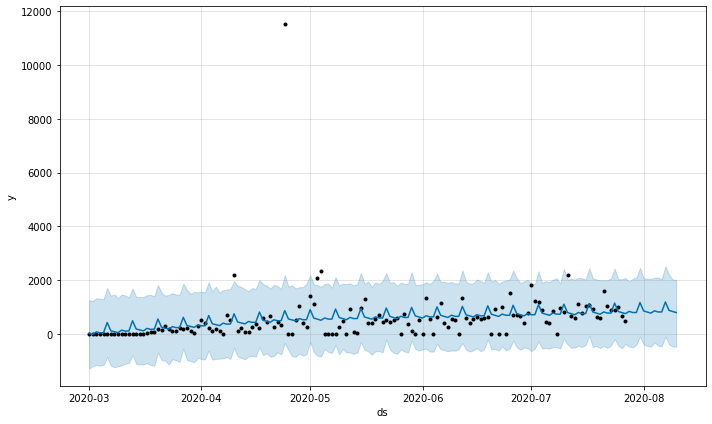

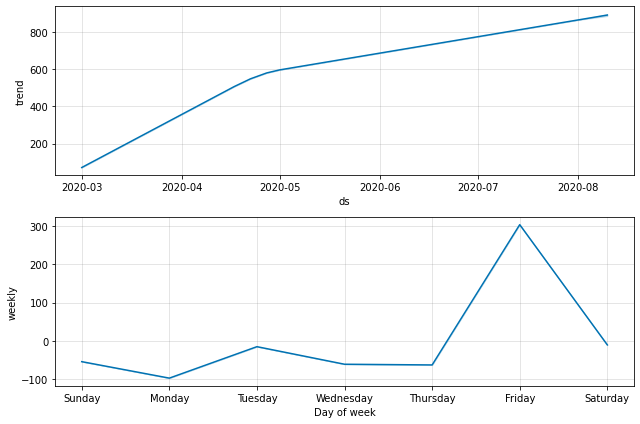

In [22]:
m = Prophet(seasonality_prior_scale=0.01, changepoint_prior_scale = 0.1).fit(df_ec)
future = m.make_future_dataframe(periods=14)

forecast = m.predict(future)
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)
fig1.show
fig2.show

### Acrescimo do lockdow do pais

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbfq58ezd/pjfr3hux.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbfq58ezd/rtqwvje7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73292', 'data', 'file=/tmp/tmpbfq58ezd/pjfr3hux.json', 'init=/tmp/tmpbfq58ezd/rtqwvje7.json', 'output', 'file=/tmp/tmpbfq58ezd/prophet_model5w3t63u8/prophet_model-20221209024256.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:42:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:42:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


      holiday         ds  lower_window   ds_upper  upper_window
0  lockdown_1 2020-03-16             0 2020-03-31            15






<bound method Figure.show of <Figure size 648x432 with 2 Axes>>

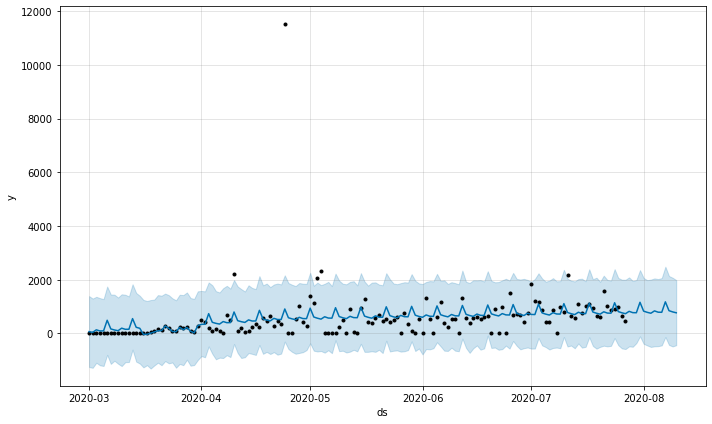

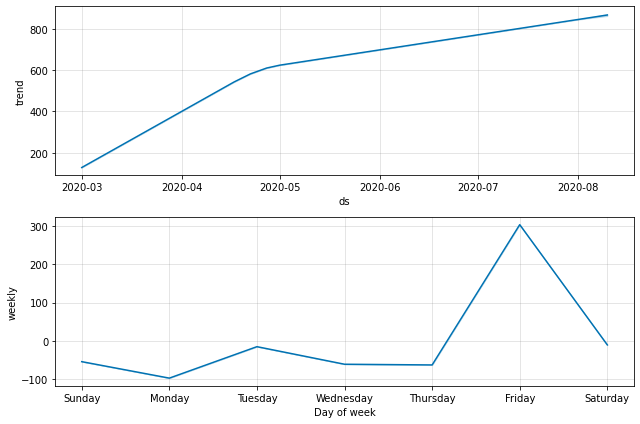

In [23]:
lockdowns = pd.DataFrame([
    {'holiday': 'lockdown_1', 'ds': '2020-03-16', 'lower_window': 0, 'ds_upper': '2020-03-31'}])
for t_col in ['ds', 'ds_upper']:
    lockdowns[t_col] = pd.to_datetime(lockdowns[t_col])
lockdowns['upper_window'] = (lockdowns['ds_upper'] - lockdowns['ds']).dt.days
print(lockdowns)

print("\n")

m2 = Prophet(holidays=lockdowns,seasonality_prior_scale=0.01, changepoint_prior_scale = 0.1)
m2 = m2.fit(df_ec)
future2 = m2.make_future_dataframe(periods=14)
forecast2 = m2.predict(future2)

print("\n")

fig1 = m.plot(forecast2)
fig2 = m.plot_components(forecast2)
fig1.show
fig2.show

###Criação do CSV

In [24]:
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()
forecast2.to_csv("prev_ecuador.csv")

## Previsão do Mexico

###Prophet Limpo

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbfq58ezd/z9f51pgy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbfq58ezd/5gbkgbn_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68949', 'data', 'file=/tmp/tmpbfq58ezd/z9f51pgy.json', 'init=/tmp/tmpbfq58ezd/5gbkgbn_.json', 'output', 'file=/tmp/tmpbfq58ezd/prophet_modeld7dyrer1/prophet_model-20221209024258.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:42:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:42:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<bound method Figure.show of <Figure size 648x432 with 2 Axes>>

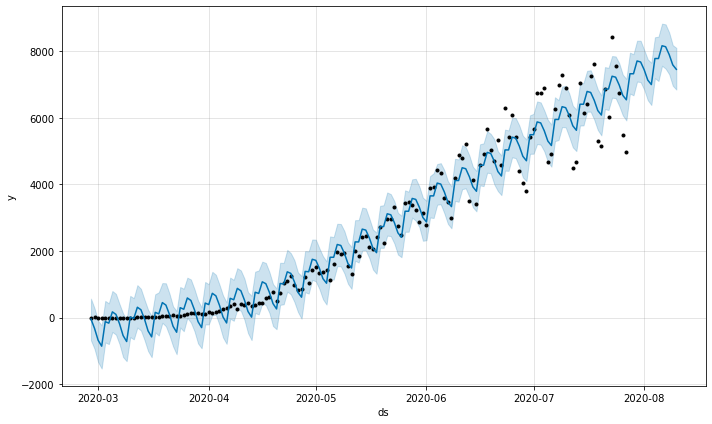

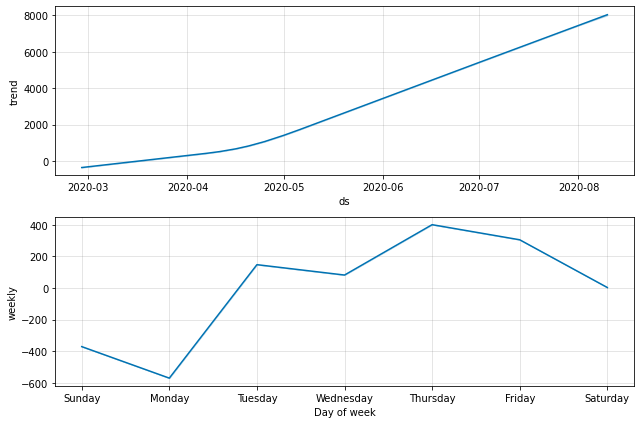

In [25]:
pais=['Mexico']
df_me = df1[df1['Country/Region'].isin(pais)]
df_me= df_me[['ds','y']]

m = Prophet()
m.fit(df_me)

future = m.make_future_dataframe(periods=14)

forecast = m.predict(future)


fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)
fig1.show
fig2.show

###Busca dos melhores parametros a ser usado no Prophet

In [26]:
param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(df_me)  # Fit model with given params
    df_cv = cross_validation(m, horizon='30 days', parallel="processes") # retirado cutoffs=cutoffs
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)
best_params = all_params[np.argmin(rmses)]
print(best_params)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbfq58ezd/mw1ysuwv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbfq58ezd/j3s2lf4s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46949', 'data', 'file=/tmp/tmpbfq58ezd/mw1ysuwv.json', 'init=/tmp/tmpbfq58ezd/j3s2lf4s.json', 'output', 'file=/tmp/tmpbfq58ezd/prophet_modell2ravfyl/prophet_model-20221209024259.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:42:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:43:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
02:43:00 - cmdstanpy - ERROR - Chain [1] 

    changepoint_prior_scale  seasonality_prior_scale         rmse
0                     0.001                     0.01  1406.257386
1                     0.001                     0.10  1380.881778
2                     0.001                     1.00  1387.462353
3                     0.001                    10.00  1383.893858
4                     0.010                     0.01  1385.388104
5                     0.010                     0.10  1350.181827
6                     0.010                     1.00  1353.655061
7                     0.010                    10.00  1348.648865
8                     0.100                     0.01   906.645678
9                     0.100                     0.10   887.939560
10                    0.100                     1.00   887.226009
11                    0.100                    10.00   886.371200
12                    0.500                     0.01   947.673632
13                    0.500                     0.10   926.261172
14        

###Utilização dos parametros obtidos

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbfq58ezd/v7rj0nhg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbfq58ezd/i0s2005t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23346', 'data', 'file=/tmp/tmpbfq58ezd/v7rj0nhg.json', 'init=/tmp/tmpbfq58ezd/i0s2005t.json', 'output', 'file=/tmp/tmpbfq58ezd/prophet_modelhd9eq1ej/prophet_model-20221209024340.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:43:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:43:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<bound method Figure.show of <Figure size 648x432 with 2 Axes>>

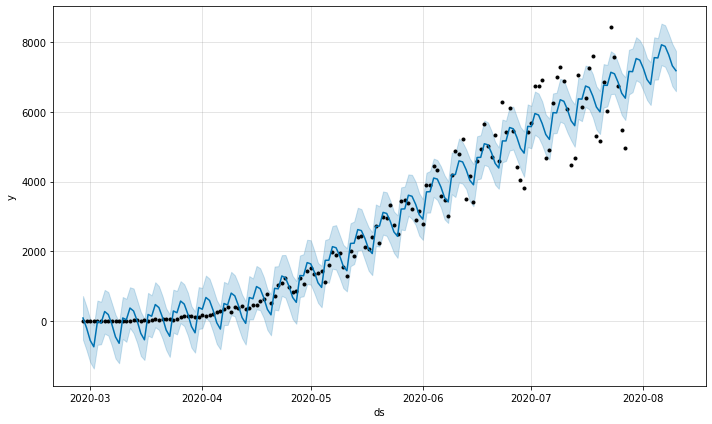

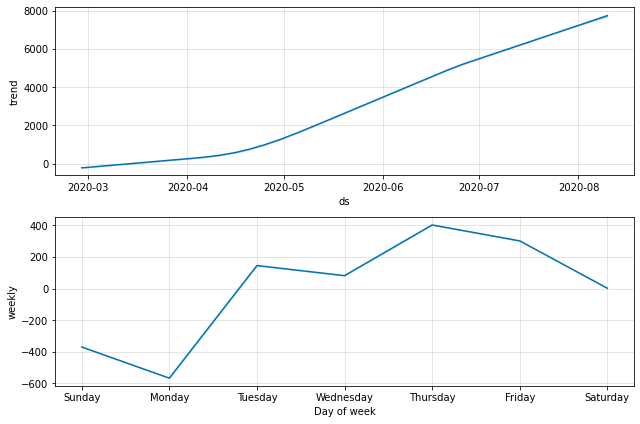

In [27]:
m = Prophet(seasonality_prior_scale=10.0, changepoint_prior_scale = 0.1).fit(df_me)
future = m.make_future_dataframe(periods=14)

forecast = m.predict(future)
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)
fig1.show
fig2.show

### Acrescimo do lockdow do pais

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbfq58ezd/4quazxdl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbfq58ezd/o402klk1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41168', 'data', 'file=/tmp/tmpbfq58ezd/4quazxdl.json', 'init=/tmp/tmpbfq58ezd/o402klk1.json', 'output', 'file=/tmp/tmpbfq58ezd/prophet_modelh4eku87t/prophet_model-20221209024342.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:43:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:43:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


      holiday         ds  lower_window   ds_upper  upper_window
0  lockdown_1 2020-03-16             0 2020-03-31            15






<bound method Figure.show of <Figure size 648x432 with 2 Axes>>

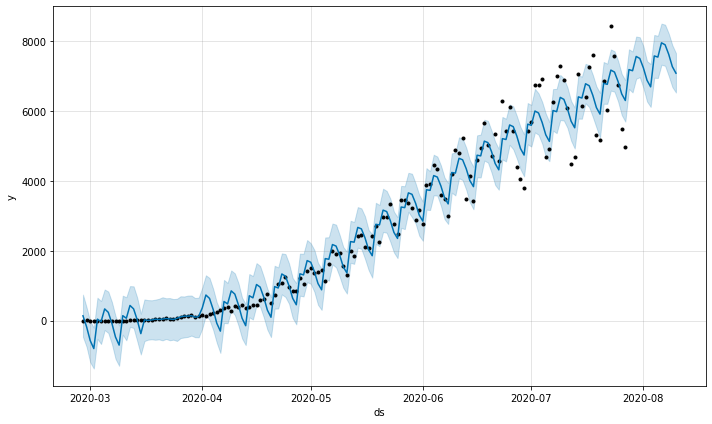

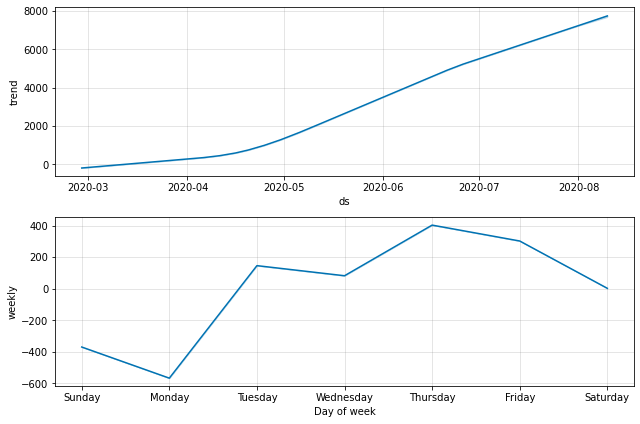

In [28]:
lockdowns = pd.DataFrame([
    {'holiday': 'lockdown_1', 'ds': '2020-03-16', 'lower_window': 0, 'ds_upper': '2020-03-31'}])
for t_col in ['ds', 'ds_upper']:
    lockdowns[t_col] = pd.to_datetime(lockdowns[t_col])
lockdowns['upper_window'] = (lockdowns['ds_upper'] - lockdowns['ds']).dt.days
print(lockdowns)

print("\n")

m2 = Prophet(holidays=lockdowns,seasonality_prior_scale=10.0, changepoint_prior_scale = 0.1)
m2 = m2.fit(df_me)
future2 = m2.make_future_dataframe(periods=14)
forecast2 = m2.predict(future2)

print("\n")

fig1 = m.plot(forecast2)
fig2 = m.plot_components(forecast2)
fig1.show
fig2.show

###Criação do CSV

In [29]:
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()
forecast2.to_csv("prev_mexico.csv")